# Welcome to Phase-splitter
Welcome to the ultimate tool for assessment of insitu atomic pair distribution functions data with the help from machine learning.
To use this algorithm you need:

    1) A folder with in situ PDF data in .gr format

Every plot and NMF components will be saved in results.    
This algorithm normalize the data in respect to the global maximum and minimum in order to perform non-negative matrix factorization. 

If there is an error then go to runtime -> Factory reset runtime, and try again

In [1]:
#This loads the algorithm from github and nessecary libraries 
%%capture
!git clone https://github.com/Kabelkim/phase-splitter
!pip install celluloid

In [2]:
import os 
from google.colab import files
os.chdir("/content/phase-splitter")
os.makedirs("results")
os.makedirs("data")
import funcs

Upload your data into colab by clicking on files on the left side and right-click on data and then click upload and select all your PDFs and upload them. 

If you just want to check out the program you can use the preinstalled data called "BiMsol06-neutral-M_A_1_1" - otherwise make sure data_dir is set to "data" 

Wait until all your data is uploaded then run all the cells in the notebook

In [3]:
data_dir = 'data'
x, y, folder = funcs.get_in_situ_data(data_dir)

Loading data
Your data is loaded correctly!


Making contour plot


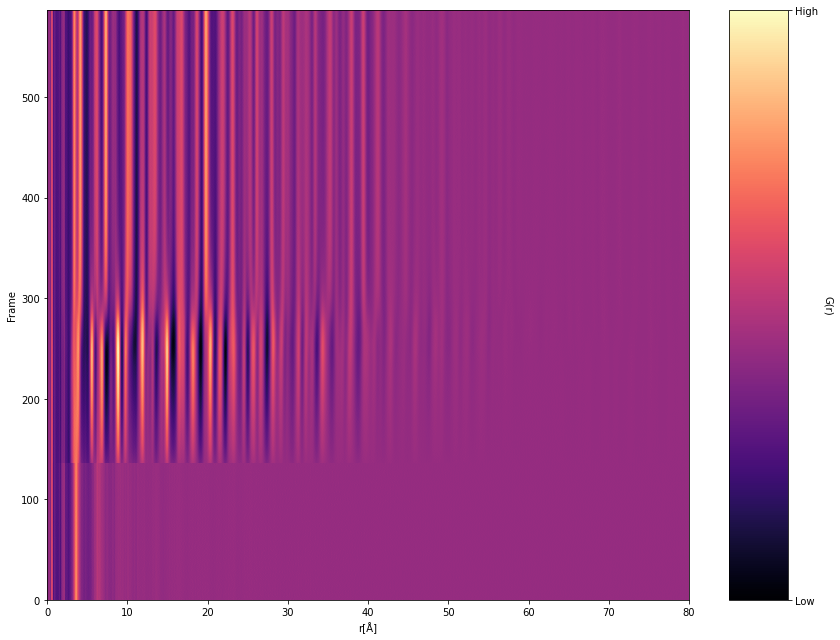

In [4]:
#Makes contour plot of all your data
funcs.insitu_plot(x, y,folder)

In [5]:
#Generate a Pearson matrix and does PCA on the data to estimate the amount of phase transitions
%%capture
funcs.gen_corr(y,folder)
funcs.PCA_plot(funcs.Normalize(y),folder)

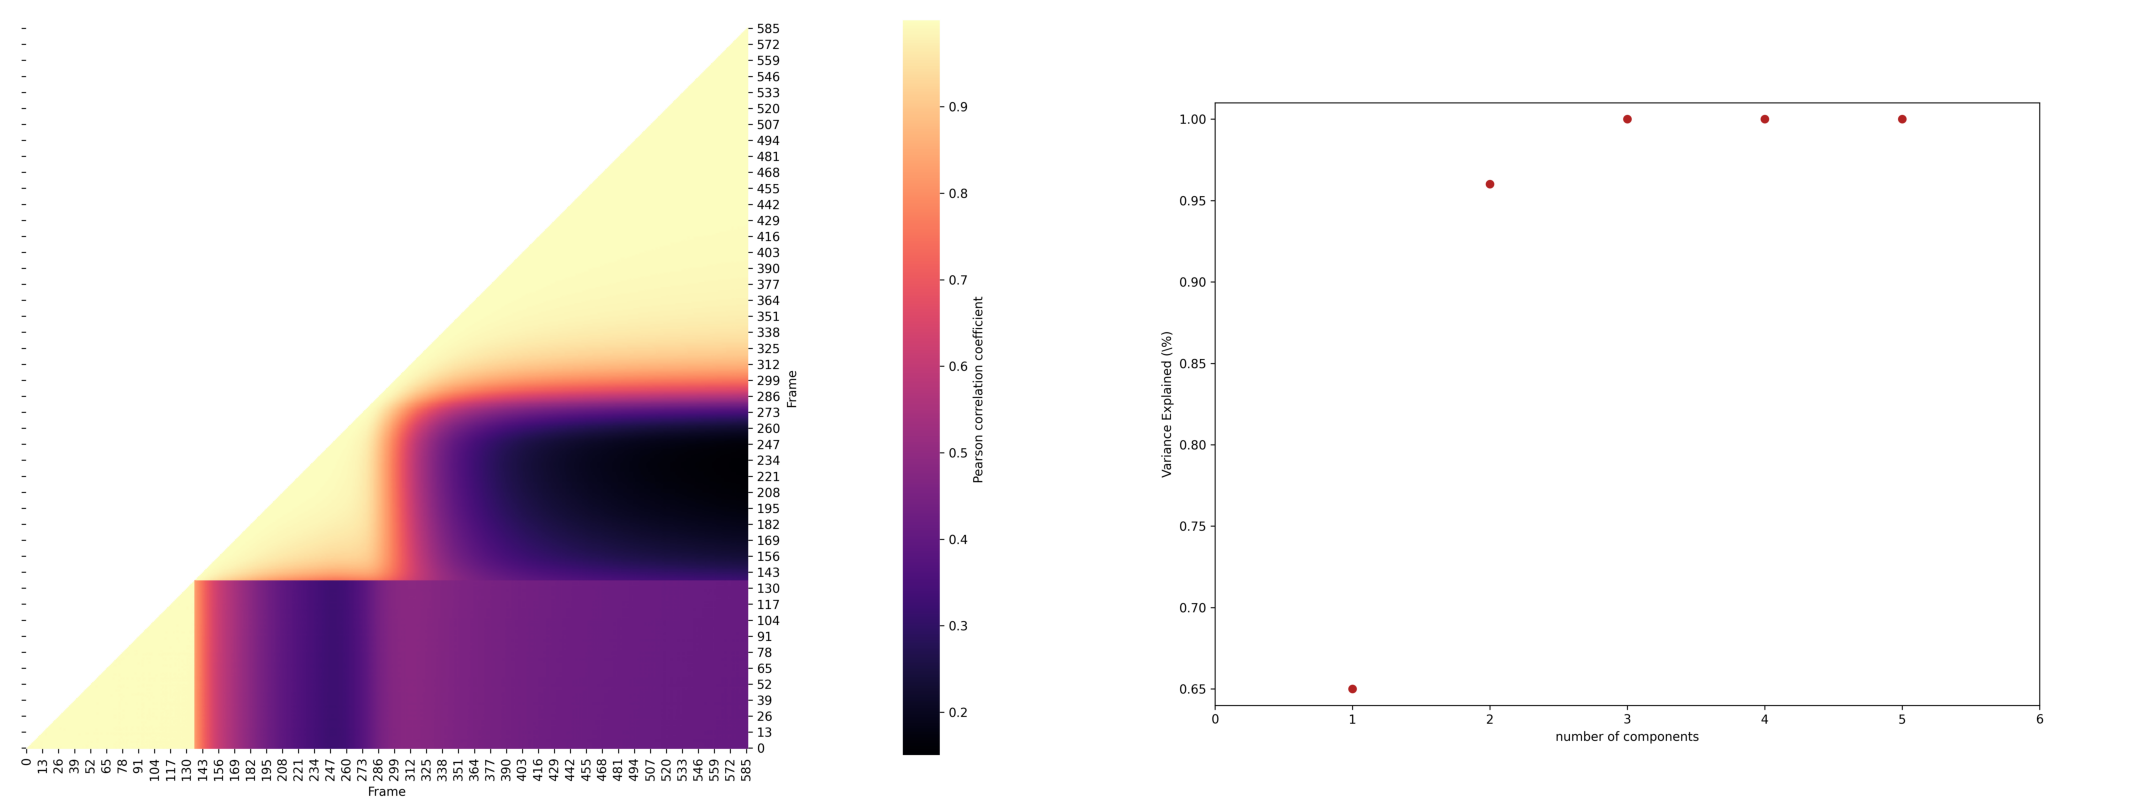

In [6]:
funcs.plot(folder)

In [7]:
funcs.phase_estimation(y)

Phase splitter's qualified guesses of phases in the data are: 3


Numbers of NMF components: 3
Calculating NMF components


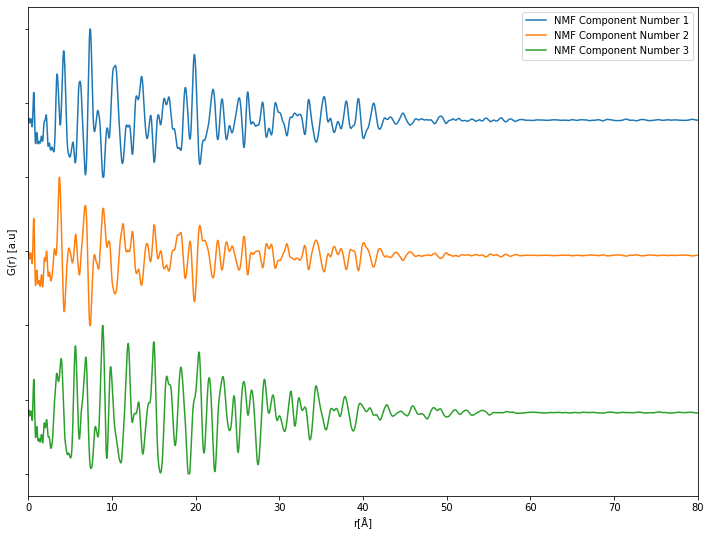

In [8]:
#Enter the desired number of components for NMF to compute
funcs.NMF_cal(x,funcs.Normalize(y),folder)

Further data exploration

In [9]:
#This will make a movie of the all the PDFs (might be time consuming) 
funcs.Dynamicgif(x,y,folder)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
#This shows approximatly where in the data the NMF components correspond to - together with a Pearson value of how close they match the direct PDF in the data
%%capture
funcs.pearson_nmf(x,y,folder)
funcs.contour_nmf(x,y,folder)

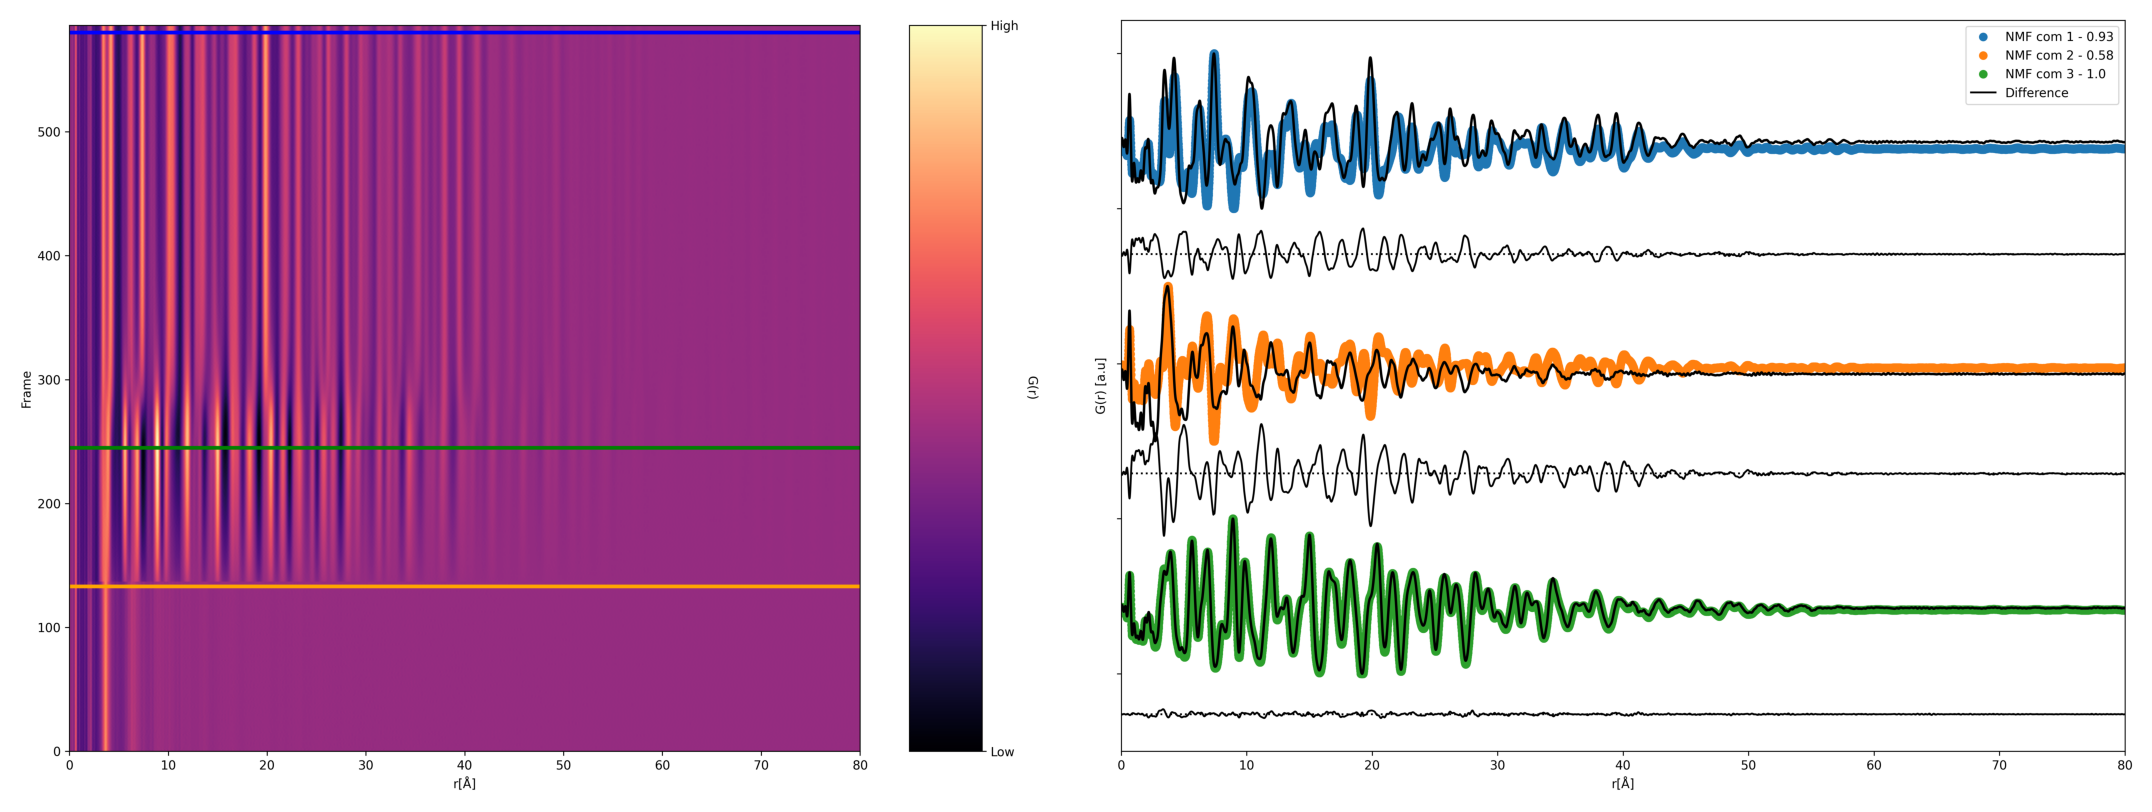

In [11]:
funcs.plot_2(folder)

In [12]:
#If you want to download your data folder from colab, then run this cell and download the .zip file
%%capture
!zip -r /content/phase-splitter/results/data_results.zip /content/phase-splitter/results/data_results